In [1]:
from google.colab import files
 
 
uploaded = files.upload()

Saving placement.csv to placement.csv


In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('placement.csv')

In [10]:
 df = df.iloc[:,1:]

In [11]:
df.shape

(100, 3)

In [12]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [15]:
import matplotlib.pyplot as plt

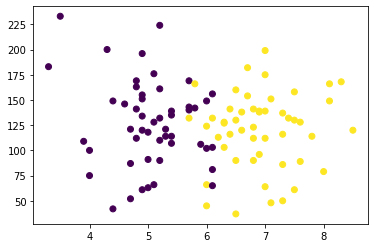

In [17]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [38]:
x = df.iloc[:,0:2] #independent variable
y = df.iloc[:,-1] #dependent variable

In [41]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [42]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split #splitting test set

In [47]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [48]:
X_train

,cgpa,iq
60,6.9,139.0
72,7.3,116.0
76,4.9,155.0
89,4.9,151.0
9,5.1,66.0
...,...,...
6,5.7,143.0
67,5.0,118.0
82,6.5,37.0
22,4.9,120.0


In [49]:
X_test

,cgpa,iq
10,6.0,45.0
52,7.0,175.0
32,7.0,139.0
5,7.1,48.0
57,6.5,130.0
93,6.8,112.0
77,7.3,50.0
1,5.9,106.0
63,6.3,128.0
46,5.3,114.0


In [50]:
y_train

60    1
72    1
76    0
89    0
9     0
     ..
6     0
67    0
82    1
22    0
28    0
Name: placement, Length: 90, dtype: int64

In [51]:
y_test

10    1
52    1
32    1
5     1
57    1
93    1
77    1
1     0
63    1
46    0
Name: placement, dtype: int64

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()

In [54]:
X_train = scaler.fit_transform(X_train)

In [55]:
X_train

array([[ 0.82885911,  0.3417282 ],
       [ 1.17144152, -0.24824459],
       [-0.88405294,  0.75214406],
       [-0.88405294,  0.6495401 ],
       [-0.71276174, -1.53079415],
       [-1.39792656,  1.90643867],
       [ 0.4006311 ,  0.39303019],
       [ 1.34273272,  0.82909704],
       [ 1.17144152, -1.01777433],
       [ 0.6575679 ,  1.44472083],
       [ 0.14369429,  0.16217127],
       [-0.96969854,  1.11125794],
       [ 0.5719223 ,  0.31607721],
       [ 0.05804869, -0.04303666],
       [-0.11324252,  1.03430497],
       [ 0.82885911, -0.76126442],
       [-0.62711613,  2.52206246],
       [ 0.05804869,  0.59823812],
       [-0.62711613,  0.90605001],
       [ 1.77096074, -1.19733127],
       [-1.14098975,  0.52128514],
       [ 0.05804869, -1.53079415],
       [-1.05534415, -1.88990803],
       [ 1.25708712,  0.16217127],
       [-0.96969854, -0.35084856],
       [-1.31228095, -2.14641794],
       [-0.19888812,  1.11125794],
       [-0.54147053, -0.11998964],
       [-0.11324252,

In [56]:
X_test = scaler.transform(X_test)

In [57]:
X_test

array([[ 0.05804869, -2.06946497],
       [ 0.91450471,  1.26516389],
       [ 0.91450471,  0.3417282 ],
       [ 1.00015031, -1.99251199],
       [ 0.4862767 ,  0.11086928],
       [ 0.74321351, -0.35084856],
       [ 1.17144152, -1.94121001],
       [-0.02759692, -0.5047545 ],
       [ 0.31498549,  0.0595673 ],
       [-0.54147053, -0.29954657]])

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
clf = LogisticRegression()

In [60]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [63]:
y_pred = clf.predict(X_test)

In [62]:
y_test

10    1
52    1
32    1
5     1
57    1
93    1
77    1
1     0
63    1
46    0
Name: placement, dtype: int64

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
accuracy_score(y_test,y_pred)

0.9

In [66]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


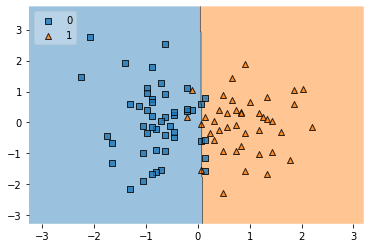

In [67]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)